<a href="https://colab.research.google.com/github/johsheldon/IMSE-541-Public/blob/main/Chapter_13_HWa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/johsheldon/IMSE-541-Public/main/13.4.csv', sep=',', na_values=".")

data  

,Run,a,b,c,I,II
0,(1),-1,-1,-1,221,311
1,a,1,-1,-1,325,435
2,b,-1,1,-1,354,348
3,ab,1,1,-1,552,472
4,c,-1,-1,1,440,453
5,ac,1,-1,1,406,377
6,bc,-1,1,1,605,500
7,abc,1,1,1,392,419


In [ ]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Run     8 non-null      object
 1   a       8 non-null      int64 
 2   b       8 non-null      int64 
 3   c       8 non-null      int64 
 4   I       8 non-null      int64 
 5   II      8 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 512.0+ bytes


In [ ]:
model_1 = ols('I ~ C(a) + C(b) + C(c) + C(a):C(b) + C(b):C(c) + C(a):C(c)', data=df).fit()
aov_table = sm.stats.anova_lm(model_1, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),378.125,1.0,0.040588,0.873437
C(b),32640.125,1.0,3.503616,0.312369
C(c),19110.125,1.0,2.051295,0.388035
C(a):C(b),903.125,1.0,0.096942,0.807842
C(b):C(c),5460.125,1.0,0.586094,0.584039
C(a):C(c),37675.125,1.0,4.044077,0.293774
Residual,9316.125,1.0,NaN,NaN


In [ ]:
model_2 = ols('II ~ C(a) + C(b) + C(c) + C(a):C(b) + C(b):C(c) + C(a):C(c)', data=df).fit()
aov_table = sm.stats.anova_lm(model_2, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),1035.125,1.0,331.24,0.034944
C(b),3321.125,1.0,1062.76,0.019522
C(c),4186.125,1.0,1339.56,0.017390
C(a):C(b),3.125,1.0,1.00,0.500000
C(b):C(c),28.125,1.0,9.00,0.204833
C(a):C(c),20503.125,1.0,6561.00,0.007859
Residual,3.125,1.0,NaN,NaN


In [ ]:
aa=df[['a']].to_numpy()
bb=df[['b']].to_numpy()
cc=df[['c']].to_numpy()
AB=aa*bb
AC=aa*cc
BC=bb*cc
ABC=aa*bb*cc
df['AB']=AB
df['AC']=AC
df['BC']=BC

X=df[['a', 'b', 'c', 'AB','AC','BC']]
X = sm.add_constant(X) # adding a constant
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,AB,AC,BC
0,1.0,-1,-1,-1,1,1,1
1,1.0,1,-1,-1,-1,-1,1
2,1.0,-1,1,-1,-1,1,-1
3,1.0,1,1,-1,1,-1,-1
4,1.0,-1,-1,1,1,-1,-1
5,1.0,1,-1,1,-1,1,-1
6,1.0,-1,1,1,-1,-1,1
7,1.0,1,1,1,1,1,1


In [ ]:
YI=df[['I']]
YI
YII=df[['II']]
YII

,II
0,311
1,435
2,348
3,472
4,453
5,377
6,500
7,419


In [ ]:
model1 = sm.OLS(YI, X)
res1=model1.fit()
print(res1.summary())


                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     1.720
Date:                Sat, 01 Oct 2022   Prob (F-statistic):              0.525
Time:                        00:45:36   Log-Likelihood:                -39.592
No. Observations:                   8   AIC:                             93.18
Df Residuals:                       1   BIC:                             93.74
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        411.8750     34.125     12.070      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [ ]:
model2 = sm.OLS(YII, X)
res2=model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     II   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1551.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):             0.0194
Time:                        00:45:41   Log-Likelihood:                -7.5915
No. Observations:                   8   AIC:                             29.18
Df Residuals:                       1   BIC:                             29.74
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        414.3750      0.625    663.000      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [ ]:
res1.resid

0    34.125
1   -34.125
2   -34.125
3    34.125
4   -34.125
5    34.125
6    34.125
7   -34.125
dtype: float64

In [ ]:
res2.resid

0    0.625
1   -0.625
2   -0.625
3    0.625
4   -0.625
5    0.625
6    0.625
7   -0.625
dtype: float64

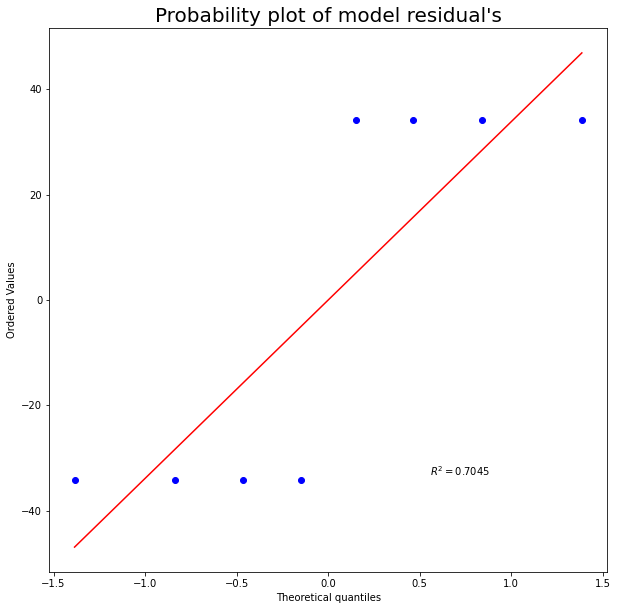

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res1.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [ ]:
data3 = pd.read_csv('https://raw.githubusercontent.com/johsheldon/IMSE-541-Public/main/13.6%20SQC.csv', sep=',', na_values=".")

data3  

In [ ]:
df=data3 #df means data frame
df.info()

In [ ]:
model_1 = ols('I ~ C(a) + C(b) + C(c) + C(d) + C(a):C(b) + C(b):C(c) + C(a):C(c) + C(a):C(d) + C(b):C(d) + C(c):C(d)', data=df).fit()
aov_table = sm.stats.anova_lm(model_1, typ=2)
aov_table